In [240]:
import pandas as pd
import matplotlib.pyplot as plt
#import glob
import datetime
import numpy as np
import matplotlib.dates as mdates

In [241]:
#import data from 2020 and the covid cases
taxi = pd.read_csv("complete_data_2020.csv")
covid = pd.read_csv("covid_cases.csv")

#merge the data to compare how when the cases the increased transportation usage decreased
taxi_covid = pd.merge(taxi, covid, on = "Date", how = "outer")
taxi_covid = taxi_covid.dropna()
taxi_covid.head()

,Date,Yellow_taxi_2020,Green_Taxi_2020,Fhv_2020,Case Count,Hospitalized Count,Death Count
0,2020-03-01,179723,11480,44800,0,4,0
1,2020-03-02,193508,13024,65168,0,21,0
2,2020-03-03,222917,14026,68632,2,20,0
3,2020-03-04,229734,14320,69476,5,22,0
4,2020-03-05,244448,14930,69880,3,20,0


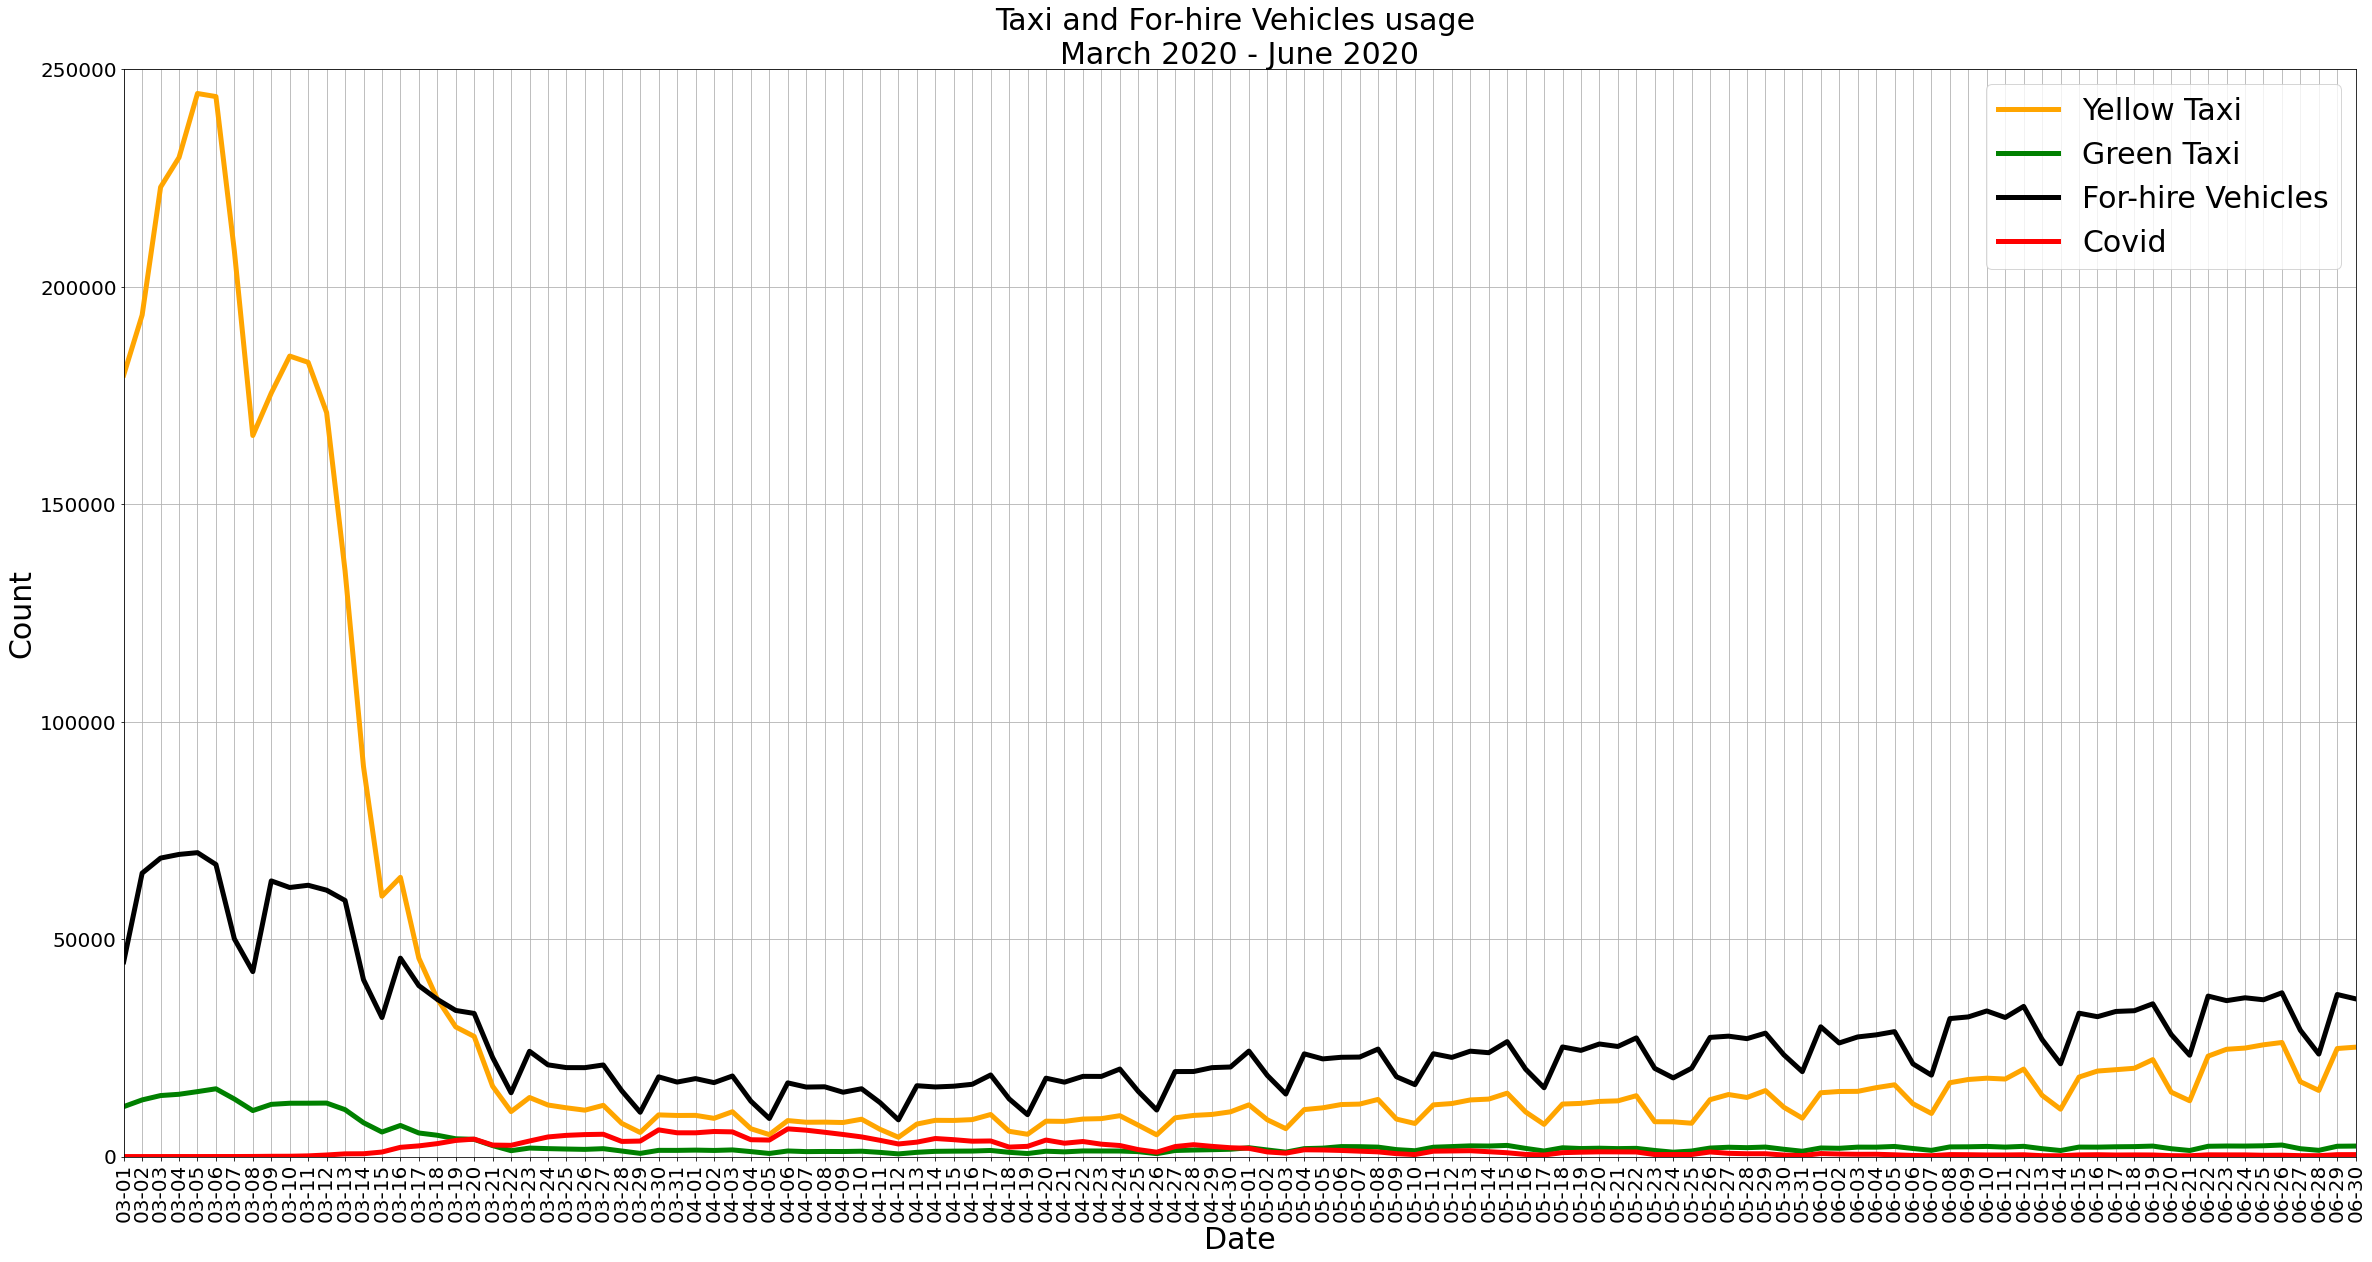

In [256]:
#get the values of x and y axis 
dates = taxi_covid["Date"]
x = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
y = taxi_covid["Yellow_taxi_2020"]
g = taxi_covid["Green_Taxi_2020"]
f = taxi_covid["Fhv_2020"]
c = taxi_covid["Case Count"]

fig, ax = plt.subplots(figsize=(40, 20))
#get axes
ax = plt.gca()
#format as dates
formatter = mdates.DateFormatter("%m-%d")
#set locator
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
ax.grid(True)

#plot values
yellow_taxi, = plt.plot(x,y,c='orange',linewidth=5,label='Yellow Taxi')
green_taxi, = plt.plot(x,g,c='green',linewidth=5, label='Green Taxi')
for_hire, =plt.plot(x,f,c='black',linewidth=5, label='For-hire Vehicles')
covid, = plt.plot(x,c,c='red',linewidth=5, label='Covid')

#set labels, lim, size, titile and legend on the graph
plt.xlabel("Date", fontsize = 30)
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(datetime.date(2020, 3, 1), datetime.date(2020, 6, 30))
plt.ylabel("Count", fontsize = 30)
plt.ylim(0, 250000)
plt.title("Taxi and For-hire Vehicles usage \nMarch 2020 - June 2020", fontsize = 30)

plt.legend(handles=[yellow_taxi,green_taxi,for_hire,covid], loc="best",prop={'size': 30})

#plt.tight_layout()
plt.show()

In [258]:
fig.savefig('Graphs/taxi_covid.png', dpi = 40)

In [138]:
#import data from 2019
taxi1 = pd.read_csv("complete_data_2019.csv")
taxi1.head()

,Date,Yellow_Taxi_2019,Green_Taxi_2019,Fhv_2019
0,2019-03-01,281130,22579,45851
1,2019-03-02,251510,18730,35839
2,2019-03-03,221835,17073,34178
3,2019-03-04,208014,15763,25005
4,2019-03-05,267813,20315,40853


In [150]:
#get the total of each transportation
yellow20 = taxi["Yellow_taxi_2020"].sum()
green20 = taxi["Green_Taxi_2020"].sum()
fhv20 = taxi["Fhv_2020"].sum()
yellow19 = taxi1["Yellow_Taxi_2019"].sum()
green19 = taxi1["Green_Taxi_2019"].sum()
fhv19 = taxi1["Fhv_2019"].sum()
print(f'{yellow20}, {green20}, {fhv20}')
print(f'{yellow19}, {green19}, {fhv19}')

4142913, 379461, 3356520
29771233, 2091328, 7245942


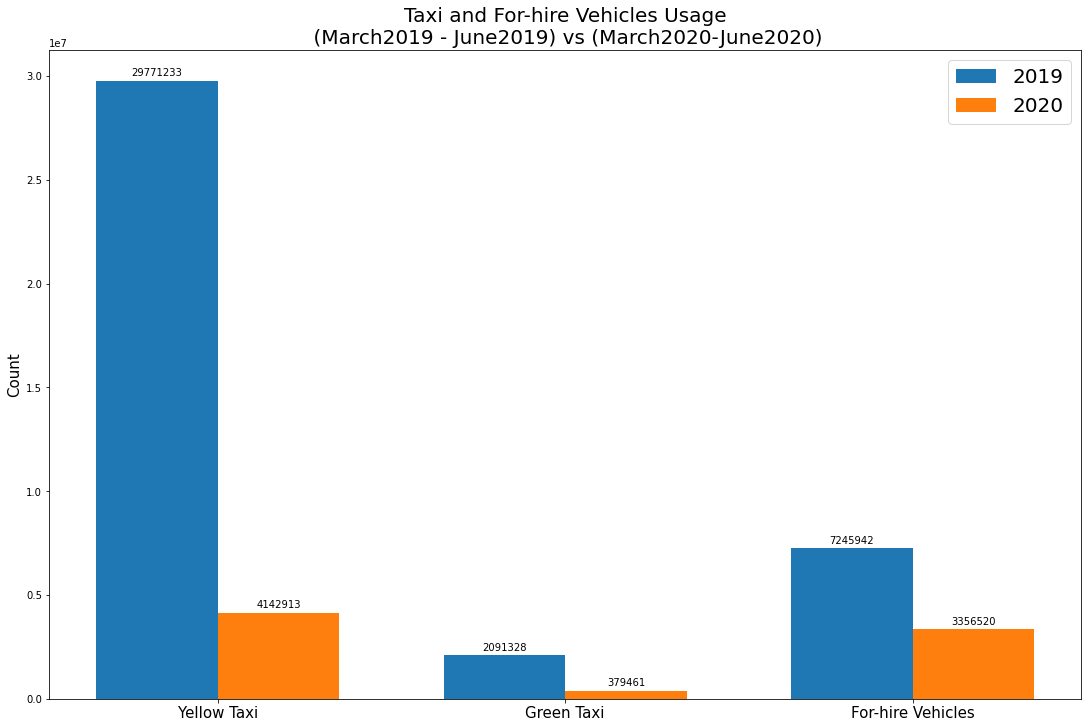

In [219]:
#plot the values in a bar  graph
x_values = ["Yellow Taxi", "Green Taxi", "For-hire Vehicles"]
for_2019 = [29771233, 2091328, 7245942]
for_2020 =[4142913, 379461, 3356520]

#set the label locations and width of the bars
x = np.arange(len(x_values))
width = 0.35

fig1,ax1 = plt.subplots(constrained_layout=True,figsize=(15, 10))
rects1 = plt.bar(x - width/2,for_2019, width, label='2019')
rects2 = plt.bar(x + width/2, for_2020, width, label='2020')

#set labels, lim, size, title and legend on the graph
plt.ylabel('Count', fontsize = 15)
plt.title('Taxi and For-hire Vehicles Usage\n (March2019 - June2019) vs (March2020-June2020)', fontsize = 20)
ax1.set_xticks(x)
ax1.set_xticklabels(x_values, fontsize = 15)
ax1.legend(prop={'size': 20})

def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height.
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)       

plt.show()

In [259]:
fig1.savefig('Graphs/2019_vs_2020.png')

In [209]:
#import the data from 2019 and 2020 by borough
borough19 = pd.read_csv("complete_data_borough_2019.csv")
borough20 = pd.read_csv("complete_data_borough_2020.csv")

#merge the data on borough
borough = pd.merge(borough19, borough20, on = "Borough")
borough

,Borough,yellow_taxi_2019,Green_Taxi_2019,Fhv_2019,Yellow_Taxi_2020,Green_Taxi_2020,Fhv_2020
0,Bronx,52103,134417,154003,36596,43796,51538
1,Brooklyn,367051,596974,130509,84249,98926,63230
2,EWR,2785,25,4782,386,7,738
3,Manhattan,26999017,742145,169131,3742788,152241,62113
4,Queens,2086686,611147,398380,246686,82695,84774
5,Staten Island,1161,967,43209,1193,569,29300
6,Unknown,263166,5758,6345928,31518,1253,1315661


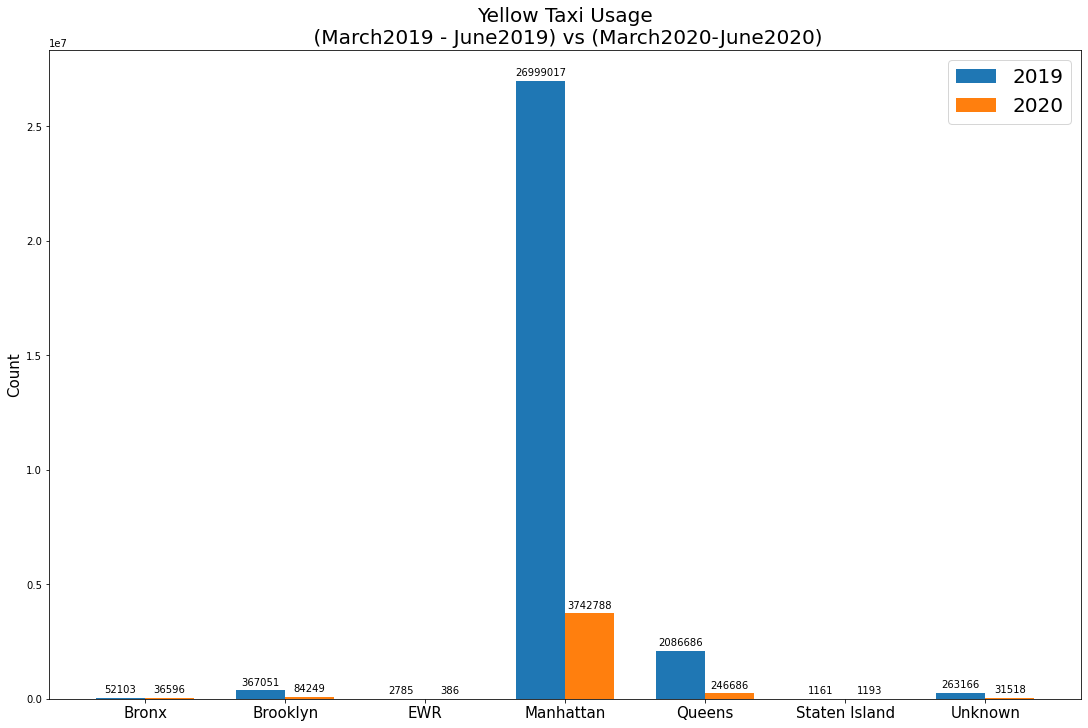

In [234]:
#plot the values in a bar  graph
x_names = ["Bronx", "Brooklyn", "EWR", "Manhattan", "Queens", "Staten Island", "Unknown"]
for_2019 = [52103, 367051, 2785, 26999017, 2086686, 1161, 263166]
for_2020 = [36596, 84249, 386, 3742788, 246686, 1193, 31518]

#set the label locations and width of the bars
x = np.arange(len(x_names))
width = 0.35

fig2,ax2 = plt.subplots(constrained_layout=True,figsize=(15, 10))
rects3 = plt.bar(x- width/2,for_2019, width, label='2019')
rects4 = plt.bar(x + width/2, for_2020, width, label='2020')

#set labels, lim, size, title and legend on the graph
plt.ylabel('Count', fontsize = 15)
plt.title('Yellow Taxi Usage\n (March2019 - June2019) vs (March2020-June2020)', fontsize = 20)
ax2.set_xticks(x)
ax2.set_xticklabels(x_names, fontsize = 15)
ax2.legend(prop={'size': 20})

def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height.
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects3)
autolabel(rects4)       

plt.show()


In [260]:
fig2.savefig('Graphs/Borough_taxi.png')